<a href="https://colab.research.google.com/github/rafaelrd-dev/Analise-Dados-Strava-Colab/blob/master/Analise_Strava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados do Strava

Tecnologias que obtem nossos dados já não são novidade. Eles podem medir nossos passos, nossa frequência cardíaca, nosso esforço. Com todos esses dados disponiveis, temos a oportunidade de criar diversas análises.

No ciclismo temos o [Strava](https://www.strava.com/), que é uma especie de rede social para aqueles que queiram armazenar os dados de suas corridas e pedais.

Nesse breve texto descrevo como desenvolvi uma análise dos dados obtidos do Strava utilizando Python no Google Colab.

Já escrevi outro texto analisando as minhas pedaladas que você pode ver [aqui!](https://medium.com/@rafael.dourado/analisando-minhas-pedaladas-com-python-postgresql-e-o-power-bi-3505ed17d12b)

Essa análise segue o modelo de uma outra análsie feita pela Cientista de Dados Linda Farczadi e você pode conferir a análise completa [aqui!](https://medium.com/epfl-extension-school/using-the-strava-api-and-python-d93d480490ef)

Primeiramente é necessario configurar o acesso a API do Strava em [https://www.strava.com/developers](https://labs.strava.com). Depois de registrar o aplicativo, você encontrará três informações importantes: Client ID, Client Secret e Token

<center><img src="https://raw.githubusercontent.com/rafaelrd-dev/Analise-Dados-Strava-Colab/master/Imagens/Anotação%202019-10-01%20161910.png"></center>

Voltando a análise, agora é necessario instalar o [*stravalib*](https://pypi.org/project/stravalib/)



In [33]:
pip install stravalib

In [0]:
# importar pacotes necessários até então

from stravalib.client import Client
import pandas as pd

Podemos então passar o token de acesso e criar uma nova instancia do Client

In [0]:
# instanciando a classe Client do Strava

client = Client(access_token="e4ccf54c7fbd26bec20940d6ad3a85a8e675ed16")

Nesse exemplo usaremos apenas dados correspondentes às atividades, sendo assim usaremos o *get_activities()* que é um método do objeto Client

In [36]:
activities = client.get_activities(limit=1000)
activities

<BatchedResultsIterator entity=Activity>

Transformando a estrutura do objeto *activities* numa lista podemos observar todos os atributos disponiveis.

In [37]:
sample = list(activities)[0]
sample.to_dict()

{'achievement_count': 0,
 'athlete': {'admin': None,
  'agreed_to_terms': None,
  'approve_followers': None,
  'athlete_type': None,
  'badge_type_id': None,
  'bikes': None,
  'city': None,
  'clubs': None,
  'country': None,
  'created_at': None,
  'date_preference': None,
  'dateofbirth': None,
  'description': None,
  'email': None,
  'email_facebook_twitter_friend_joins': None,
  'email_kom_lost': None,
  'email_language': None,
  'email_send_follower_notices': None,
  'facebook_sharing_enabled': None,
  'firstname': None,
  'follower': None,
  'follower_count': None,
  'follower_request_count': None,
  'friend': None,
  'friend_count': None,
  'ftp': None,
  'global_privacy': None,
  'instagram_username': None,
  'lastname': None,
  'max_heartrate': None,
  'measurement_preference': None,
  'membership': None,
  'mutual_friend_count': None,
  'offer_in_app_payment': None,
  'owner': None,
  'plan': None,
  'premium': None,
  'premium_expiration_date': None,
  'profile': None,
  '

Dentre todos os atributos disponiveis irei utilizar os seguintes:

* **average_speed:** velocidade média
* **average_watts:** potencia média
* **distance:** distancia
* **elapsed_time:** tempo do percurso
* **total_elevation_gain:** total de ganho de elevação
* **type:** tipo de esporte (Ride/Run)
* **start_date_local:** data hora do evento

In [0]:
my_cols =['average_speed',
          'average_watts', 
          'distance',
          'elapsed_time',
          'total_elevation_gain',
          'type', 
          'start_date_local']

Agora vou armazenar os dados que estou interessado

In [0]:
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])

Agora podemos converter essa lista num dataframe usando o pandas

In [0]:
df = pd.DataFrame(data, columns=my_cols)

## Limpeza dos Dados

É necessario nesse momento realizar a limpeza dos dados. Inicialmente é necessario realizar uma previa dos dados.

In [41]:
df.head ()

,average_speed,average_watts,distance,elapsed_time,total_elevation_gain,type,start_date_local
0,5.044,196.7,5246.2,0:24:47,85.8,Ride,2019-10-03T07:17:03
1,5.102,188.7,4637.3,0:19:10,67.7,Ride,2019-10-02T17:43:58
2,3.801,181.3,5564.2,0:46:10,95.0,Ride,2019-10-02T07:15:24
3,4.456,194.4,4625.1,0:22:50,67.5,Ride,2019-10-01T17:35:49
4,5.757,217.3,5141.4,0:20:44,86.3,Ride,2019-10-01T07:28:19


In [42]:
# visualizando o index e a quantidade de linhas
df.index

RangeIndex(start=0, stop=252, step=1)

Com o comando colums é possivel visualizar os rotulos das colunas

In [43]:
df.columns

Index(['average_speed', 'average_watts', 'distance', 'elapsed_time',
       'total_elevation_gain', 'type', 'start_date_local'],
      dtype='object')

Com o comando shape é possivel obter a quantidade de linhas e colunas

In [44]:
df.shape

(252, 7)

Com o método *info* podemos verificar os tipos de dados de cada coluna, assim como o numero de valores ausentes.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
average_speed           252 non-null float64
average_watts           238 non-null float64
distance                252 non-null float64
elapsed_time            252 non-null object
total_elevation_gain    252 non-null float64
type                    252 non-null object
start_date_local        252 non-null object
dtypes: float64(4), object(3)
memory usage: 13.9+ KB


Para as colunas numéricas, obtemos facilmente algumas estatísticas resumidas usando o método *DataFrame.describe()*

In [46]:
df.describe()

,average_speed,average_watts,distance,total_elevation_gain
count,252.000000,238.000000,252.000000,252.000000
mean,5.030016,158.568487,17967.086111,252.443651
std,1.156885,35.923400,25301.712208,380.358629
min,1.214000,56.900000,1295.700000,0.000000
25%,4.696000,143.800000,4830.275000,67.800000
50%,5.030000,164.950000,5331.700000,84.500000
75%,5.390250,182.350000,18397.400000,244.175000
max,18.255000,243.300000,151993.000000,2267.800000


Nas variaveis categoricas, podemos observar as pedaladas e as corridas

In [47]:
df['type'].value_counts()

Ride    246
Run       6
Name: type, dtype: int64

Como eu quero analisar somente as pedaladas, irei recriar o dataframe sem as corridas

In [0]:
df = df [df ['type']. isin (['Ride'])]

Utilizando novamene o comando *value_counts()* observamos que possuimos somente valores de pedaladas

In [49]:
df['type'].value_counts()

Ride    246
Name: type, dtype: int64

O Dataframe possui alguns valores ausentes como em *average_watts*, são provavelmente pedaladas que eu gravei manualmente. Sendo assim irei remove-las do Dataframe.

In [50]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 249
Data columns (total 7 columns):
average_speed           238 non-null float64
average_watts           238 non-null float64
distance                238 non-null float64
elapsed_time            238 non-null object
total_elevation_gain    238 non-null float64
type                    238 non-null object
start_date_local        238 non-null object
dtypes: float64(4), object(3)
memory usage: 14.9+ KB


Agora irei transformar a distancia em quilometros e a velocidade media em quilometros por hora e arredondar os valores resultantes em duas casas decimais

In [0]:
df['distance'] = df['distance']/1000
df['distance'] = df['distance'].round(2)
df['average_speed'] = df['average_speed'] * 18/5
df['average_speed']  = df['average_speed'].round(2)

Sobre os dados do tempo pedalado temos um problema com as datas, a maioria está no formado *h:mm:ss* e outras estão *hh:mm:ss*

In [52]:
df['elapsed_time'].str.len().value_counts()

7    235
8      3
Name: elapsed_time, dtype: int64

Podemos comprovar visualizando essas datas

In [53]:
df[df['elapsed_time'].str.len() == 7]['elapsed_time']

0      0:24:47
1      0:19:10
2      0:46:10
3      0:22:50
4      0:20:44
5      0:21:24
6      0:25:52
7      0:20:14
8      0:21:17
9      0:18:47
10     0:19:08
11     0:45:04
12     0:19:06
13     0:26:53
14     0:21:18
15     0:21:34
16     0:22:54
17     0:21:07
18     0:19:08
19     0:22:05
20     0:21:14
21     0:21:50
22     0:20:22
23     0:20:39
24     0:16:30
25     0:22:26
26     0:21:01
27     0:24:07
28     0:16:09
29     0:21:52
        ...   
219    4:03:29
220    1:01:45
221    4:26:33
222    0:44:56
223    0:52:36
224    5:35:59
225    1:29:46
226    7:33:26
227    4:30:27
228    1:32:15
229    2:09:15
230    4:16:33
231    1:29:01
232    0:35:10
233    0:58:02
234    1:04:38
235    0:39:48
236    4:01:30
237    1:15:41
238    2:36:07
239    1:58:22
241    0:43:40
242    3:04:07
243    3:24:28
244    0:51:18
245    4:20:33
246    0:38:24
247    0:54:41
248    1:23:19
249    0:59:05
Name: elapsed_time, Length: 235, dtype: object

Para corrigir isso irei criar uma função para alterar essas datas e trasnformalas em inteiros com os valores em minutos

In [0]:
def get_minutes(time_str):
    
    h, m, s = time_str.split(':') 
    total_min = int(h)*60+int(m)+int(s)/60
    return int(total_min)

E com isso criando uma outra coluna, chamada *time_min*

In [0]:
df['time_min'] = df['elapsed_time'].apply(get_minutes)

Feito isso, iremos deletar a coluna original *elapsed_time*

In [56]:
df.drop('elapsed_time', axis=1, inplace=True)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,type,start_date_local,time_min
0,18.16,196.7,5.25,85.8,Ride,2019-10-03T07:17:03,24
1,18.37,188.7,4.64,67.7,Ride,2019-10-02T17:43:58,19
2,13.68,181.3,5.56,95.0,Ride,2019-10-02T07:15:24,46
3,16.04,194.4,4.63,67.5,Ride,2019-10-01T17:35:49,22
4,20.73,217.3,5.14,86.3,Ride,2019-10-01T07:28:19,20


Observe que a coluna *start_date_local* está num formato estranho, seria ideal converte-la num datetime e posteriormente transforma-la no index do nosso Dataframe

In [0]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'])

In [58]:
df.set_index('start_date_local', inplace=True)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,type,time_min
start_date_local,,,,,,
2019-10-03 07:17:03,18.16,196.7,5.25,85.8,Ride,24
2019-10-02 17:43:58,18.37,188.7,4.64,67.7,Ride,19
2019-10-02 07:15:24,13.68,181.3,5.56,95.0,Ride,46
2019-10-01 17:35:49,16.04,194.4,4.63,67.5,Ride,22
2019-10-01 07:28:19,20.73,217.3,5.14,86.3,Ride,20


A parte da hora da coluna *start_date_local* não nos importa, então vamos remove-la. E remonear o campo apenas como date

In [59]:
df.index = df.index.round('D')
df.index.rename('date', inplace=True)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,type,time_min
date,,,,,,
2019-10-03,18.16,196.7,5.25,85.8,Ride,24
2019-10-03,18.37,188.7,4.64,67.7,Ride,19
2019-10-02,13.68,181.3,5.56,95.0,Ride,46
2019-10-02,16.04,194.4,4.63,67.5,Ride,22
2019-10-01,20.73,217.3,5.14,86.3,Ride,20


O proximo passo será remover valores discrepantes. Para isso irei agrupar os valores, posteriormente aplicar uma função que calcula o número de desvios padão da média. 

In [0]:
grouped = df.groupby('type')

In [0]:
def f(group):
    return (group-group.mean()).abs().div(group.std())

In [62]:
grouped.transform(f).head()

,average_speed,average_watts,distance,total_elevation_gain,time_min
date,,,,,
2019-10-03,0.043844,1.061467,0.513314,0.459530,0.490172
2019-10-03,0.006928,0.838771,0.536906,0.506200,0.530900
2019-10-02,1.126993,0.632777,0.501325,0.435808,0.310969
2019-10-02,0.556406,0.997442,0.537293,0.506716,0.506463
2019-10-01,0.577516,1.634910,0.517569,0.458241,0.522754


Feito isso, agora é remover os valores que estão 3 vezes acima da média

In [0]:
outliers = grouped.transform(f) > 3
df = df[~outliers.any(axis=1)]

Apos isso vemos uma redução na quantidade de valores a serem analisados

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 227 entries, 2019-10-03 to 2015-07-09
Data columns (total 6 columns):
average_speed           227 non-null float64
average_watts           227 non-null float64
distance                227 non-null float64
total_elevation_gain    227 non-null float64
type                    227 non-null object
time_min                227 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.4+ KB


## Analise Exploratoria

Passamos pela obtenção e limpeza dos dados, agora é hora de realizarmos a análise exploratoria dos dados

O priemiro passo aqui é importar outras dependencias

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns

Estou utilizando o pairplot para visualizar histogramas e graficos de dispersão com isso podemos verificar a distribuição ds valores de cada variavel e a relação entre cada variavel.

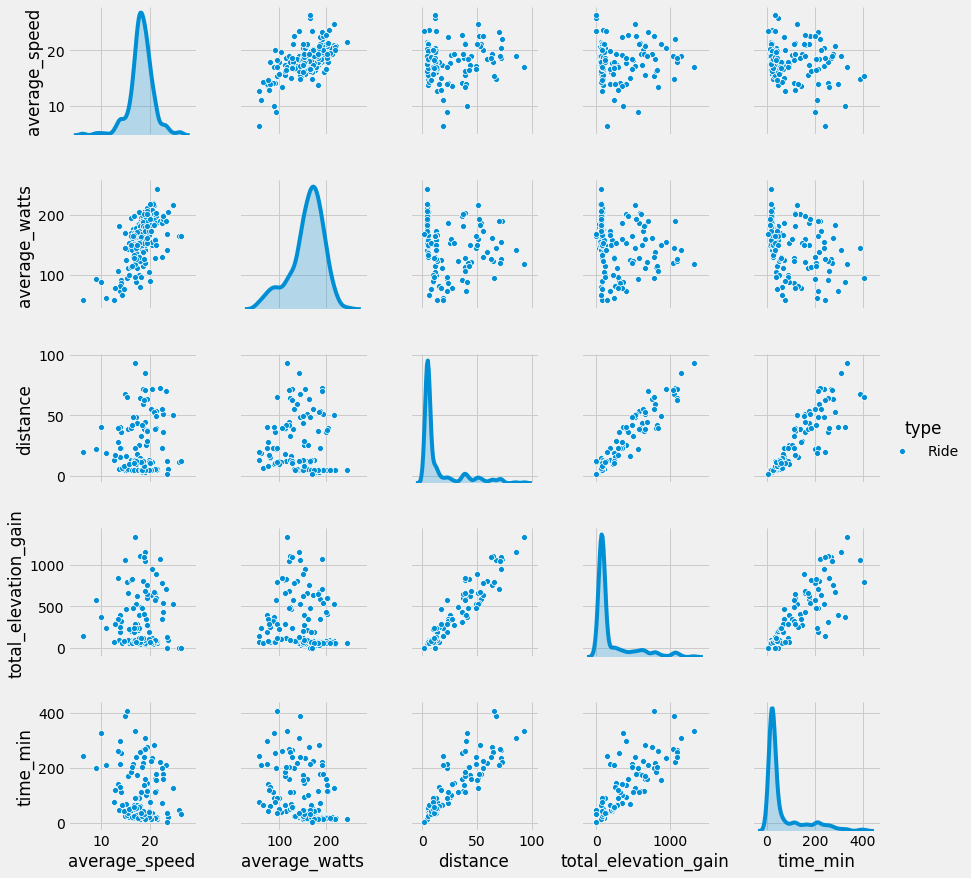

In [66]:
sns.pairplot(df, hue='type')

Outro grafico util é o grafico de correlação. Para isso, estou utilizando o DataFrame.corr(), que é um método do Pandas que calcula a correlação entre cada par de colunas numericas. E em seguida estou usando o sns.heatmap() que é um método do Seaborn que vai plotar esses valores


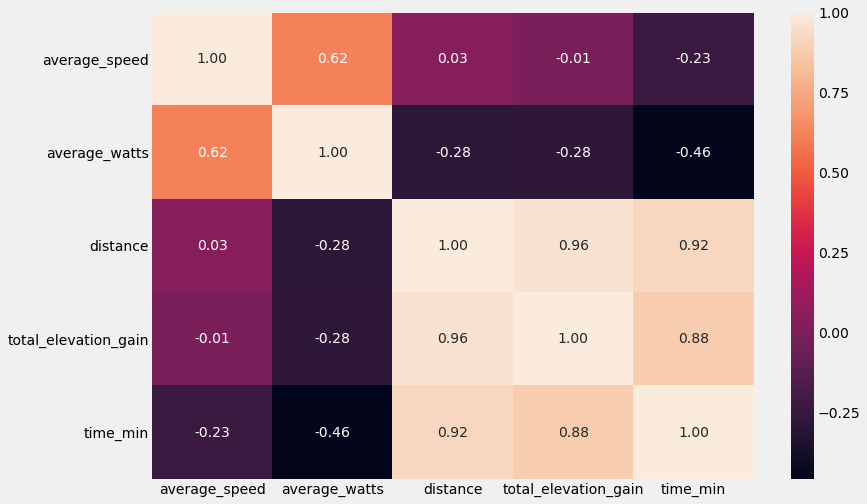

In [67]:
corr = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

Podemos verrificar uma alta correlação entre total_evevation_gain, time_min e distance

Vamos agora investigar algumas tendencias no tempo de pedaladas. Em especial o tempo médio de treinamento por dia da semana.

Para começar, vamos criar uma copia do Dataframe, pois iremos fazer algumas modificações nele.


In [0]:
trends = df.copy()

Garantir que temos o DateTimeIndex como indice

In [0]:
trends.set_index(pd.to_datetime(trends.index), drop=True, inplace=True)

Usando o atributo *weekday* é possivel separar as datas por dia da semana

In [0]:
trends['weekday'] = trends.index.map(lambda x: x.weekday)

Agora agrupamos as médias dos valores por dia da semana

In [71]:
trends.groupby('weekday').mean()

,average_speed,average_watts,distance,total_elevation_gain,time_min
weekday,,,,,
0,19.032800,160.960000,20.549600,316.916000,79.680000
1,18.348649,163.200000,11.194595,146.867568,47.162162
2,18.563143,170.151429,7.763714,109.671429,30.628571
3,18.291579,166.400000,10.411053,140.955263,46.052632
4,18.585263,172.839474,10.599474,159.105263,41.868421
5,18.227576,151.884848,22.556970,313.496970,89.515152
6,15.998571,107.995238,33.861429,441.071429,195.857143


Plotando o grafico temos:

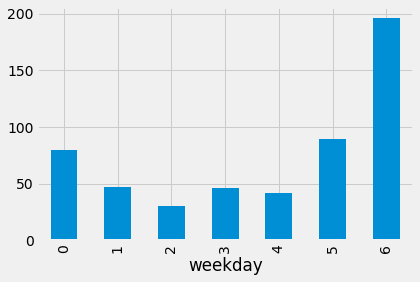

In [72]:
trends.groupby('weekday').mean()['time_min'].plot(kind='bar')

Da pra melhorar esse grafico definindo os rótudos do eixo x, com os nomes reais dos dias e adicionando títulos e etiquetas

Importando as dependencias necessarias:

In [73]:
import calendar
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Text(0.5, 1.0, 'Tempo médio em minutuos')

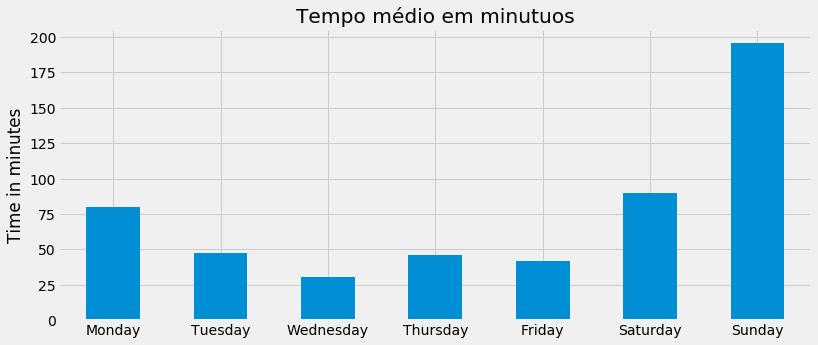

In [74]:
trends.groupby('weekday').mean()['time_min'].plot(kind='bar', figsize=(12,5));
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal');
plt.xlabel('')
plt.ylabel('Time in minutes')
plt.title('Tempo médio em minutuos')

Bem melhor! Agora vamos fazer um gráfico semelhante a esse porém por ano

Primeiramente vamos definir uma nova coluna para o ano

In [0]:
trends['year'] = trends.index.map(lambda x: x.year)

E posterirmente agrupar os valores da média por ano e por tipo, no nosso caso só pedaladas

In [76]:
grouped = trends.groupby(['year', 'type']).mean()
grouped

,,average_speed,average_watts,distance,total_elevation_gain,time_min,weekday
year,type,,,,,,
2015,Ride,16.376600,108.468000,31.355200,458.114000,155.520000,3.960000
2016,Ride,21.473158,178.715789,41.120000,476.189474,154.052632,2.947368
2017,Ride,17.597500,160.725000,16.237500,248.700000,62.750000,2.250000
2018,Ride,19.265000,161.841667,9.105000,126.841667,32.500000,2.750000
2019,Ride,18.414366,174.541549,6.551338,96.728873,27.274648,2.591549


Separando somente os valores da média dos minutos por ano

In [77]:
grouped['time_min'].unstack('type')

type,Ride
year,
2015,155.520000
2016,154.052632
2017,62.750000
2018,32.500000
2019,27.274648


In [0]:
result = grouped['time_min'].unstack('type').fillna(0)

Armazenando os dados do tempo médio dos pedaois e o ano a uma variavel e posteriormente plotando o gráfico

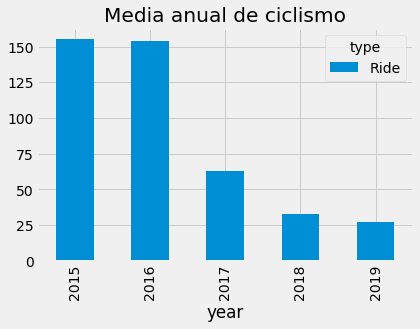

In [79]:
result.plot(kind='bar', stacked=True)
plt.title('Media anual de ciclismo');

## Analise de Cluster

Agora iremos descobrir os grupos de pedaladas que possuo, ou sejá clusteriza-los



In [80]:
df.drop(['type'], axis=1, inplace=True)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,time_min
date,,,,,
2019-10-03,18.16,196.7,5.25,85.8,24
2019-10-03,18.37,188.7,4.64,67.7,19
2019-10-02,13.68,181.3,5.56,95.0,46
2019-10-02,16.04,194.4,4.63,67.5,22
2019-10-01,20.73,217.3,5.14,86.3,20


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


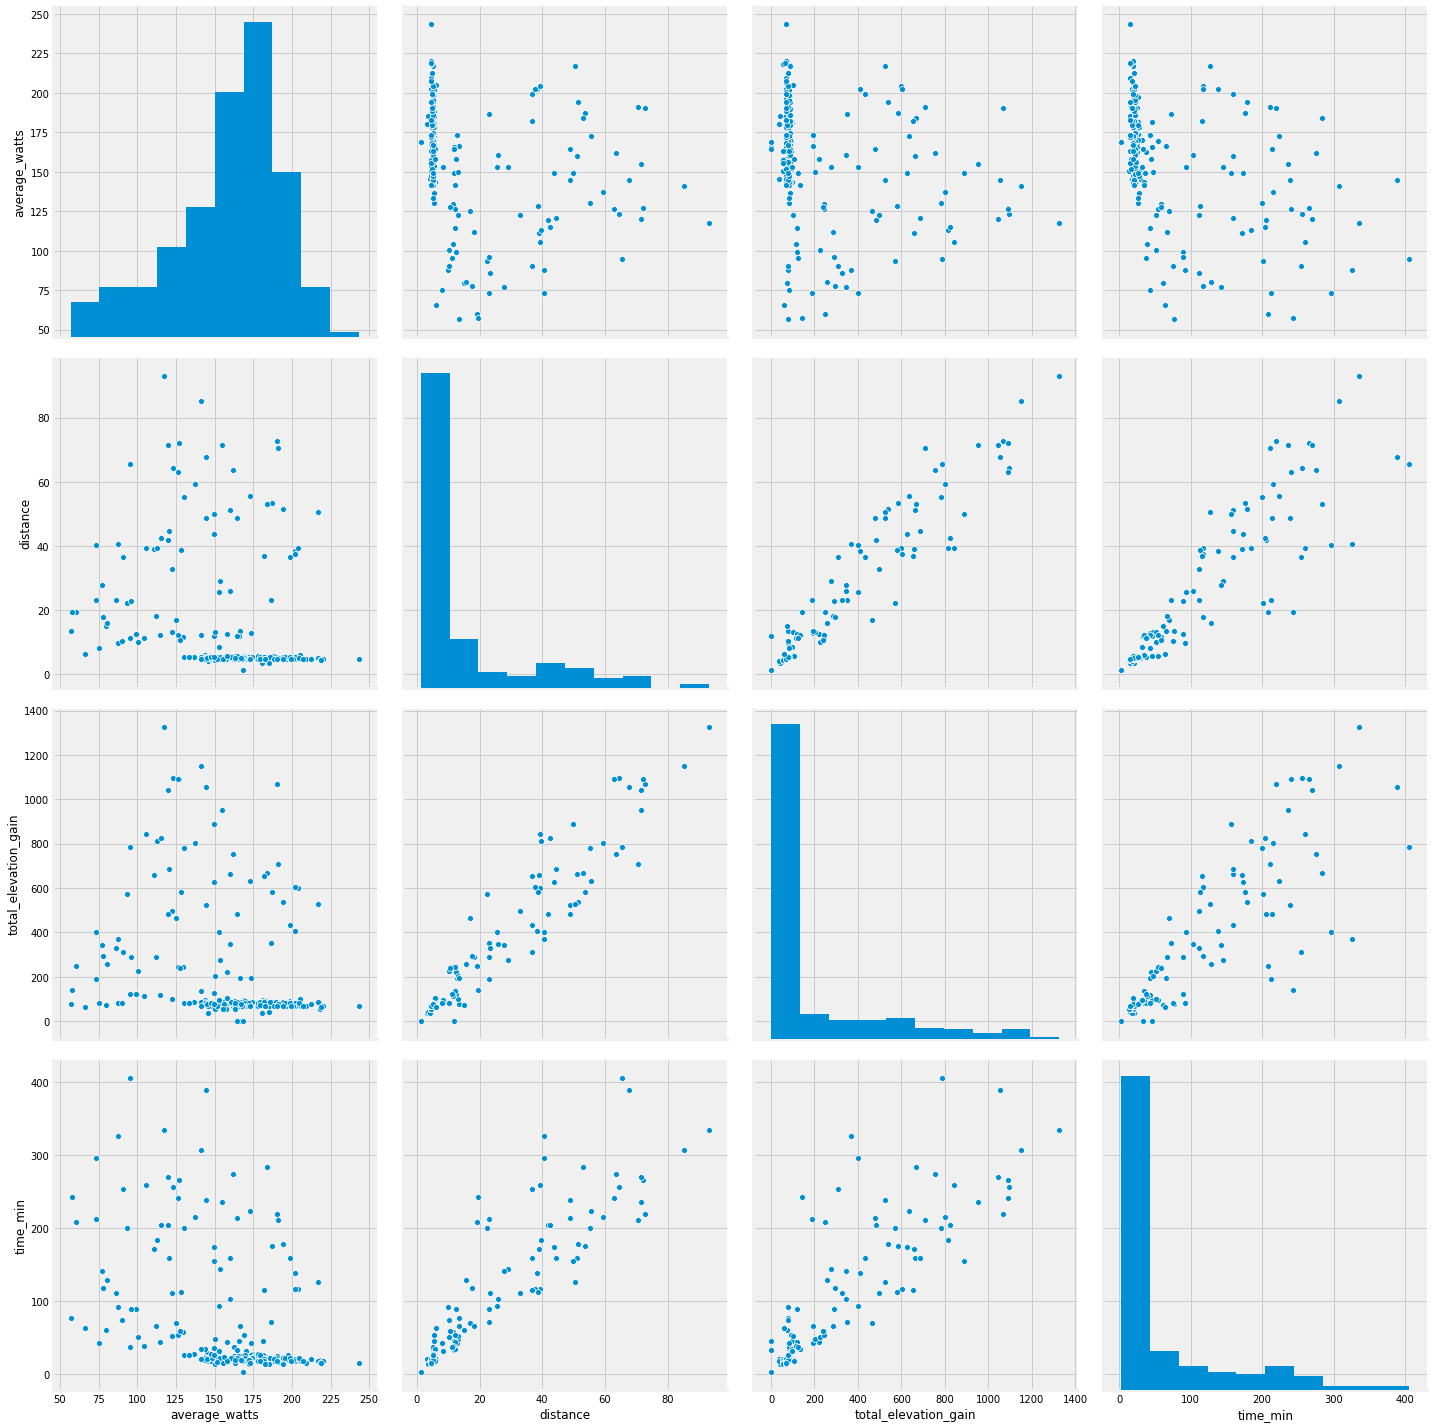

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cols = ['average_watts', 'distance', 'total_elevation_gain', 'time_min' ]
sns.pairplot(x_vars=cols, y_vars=cols, data=df, size=5);

In [0]:
import sklearn
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)

In [0]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
df['Cluster'] = model.labels_

Apos implementarmos o algoritimo K-means podemos plotar um grafico para observar a representação visual do cluster

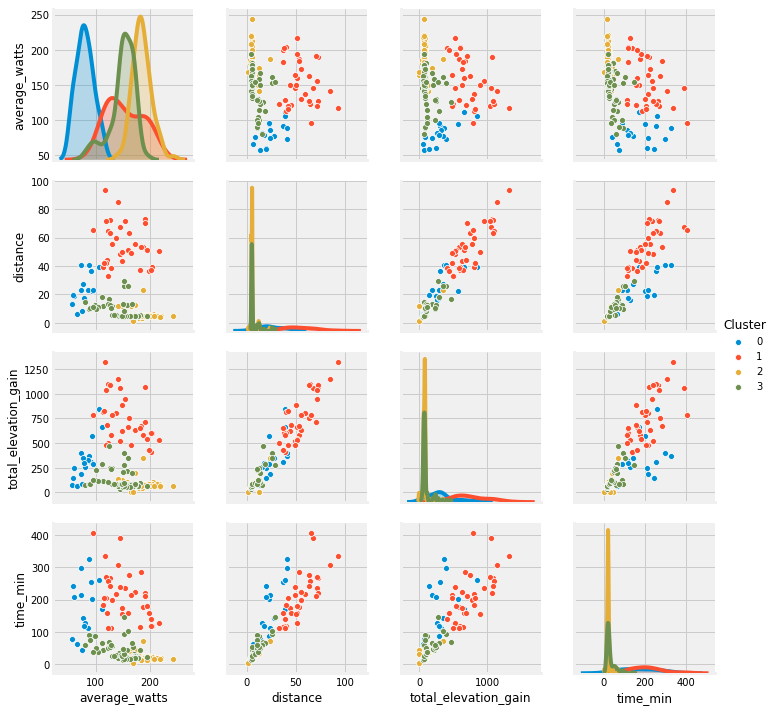

In [84]:
sns.pairplot(x_vars=cols, y_vars=cols, hue='Cluster', data=df);

Pelo gráfico já podemos tirar uma serie de análises, mas tambem podemos retirar uma média dos valores por cluster

In [85]:
df.groupby('Cluster').mean()

,average_speed,average_watts,distance,total_elevation_gain,time_min
Cluster,,,,,
0,12.921176,80.435294,24.415294,321.711765,173.470588
1,19.430000,154.000000,54.576857,755.042857,211.085714
2,19.596667,185.210000,5.614111,80.956667,22.544444
3,17.409647,150.148235,7.329647,106.164706,33.541176


E os desvios padrão

In [86]:
df.groupby('Cluster').std()

,average_speed,average_watts,distance,total_elevation_gain,time_min
Cluster,,,,,
0,2.599916,15.860838,11.199598,209.681028,85.215989
1,2.353974,33.224521,14.828693,238.229250,74.531624
2,1.614570,16.996371,2.552568,36.788020,7.801125
3,1.085732,22.909733,4.964839,78.100250,23.349086


A partir disso podemos retirar as seguintes observações

* **Cluster 0** - Pedaladas com grande velocidade média, distancia elevada e potencia média elevada
* **Cluster 2** - Pedaladas com pequena distancia, porem grande velociadade média. São os pedais que vou ao trabalho
* **Cluster 3** - Pedaladas com baixa distancia, baixa velocidade media e baixa potencia, provavelmente são pedais recreativos, a passeio
* **Cluster 1** - Pedais com grande distancia, grande tempo de percurso, grande elevação e média velocidade. Esse é o tipo de pedal que chamamos de longão, são pedais de treino.

Fora esses 4 clusters poderia ter um 5º, que seria pedais de longa distancia. Mas foram retirados por estarem acima de 3 vezes da média.

Obviamente quando se trata de aprendizado não supervisionado não há verdade absoluta contra a qual possamos comparar o desempenho do algoritimo. Mas quando usamos esse conhecimento no conjunto de dados, descobrimos que, neste caso, os quatro grupos fazem sentido. Nesse sentido, o algoritimo K-means nos ajudou a descobrir informações que podem tirar novos insights.

Obrigado se você chegou até aqui. 


Vlw
